# Titanic Dataset Analysis and Survival Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Titanic-Dataset.csv", na_values = "N/A")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary  
Survived: 0 = No, 1 = Yes <br>
Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd <br>
SibSp: # of siblings / spouses aboard the Titanic <br>
Parch: # of parents / children aboard the Titanic <br>
Ticket: Ticket number <br>
Cabin: Cabin number <br>
Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton <br>

In [7]:
# Number of rows and columns

df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Checking the number of null values in each columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 ### Handling Missing Values 

In [11]:
# Cabin column doesn't contribute much to the prediction, so dropping it.

df = df.drop(columns = 'Cabin', axis = 1)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
# Replacing the missing values in Age column using the mean value

df['Age'] = df['Age'].fillna(df['Age'].mean())

In [14]:
# Replacing the missing values in Embarked column using mode value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

As we can see the NULL values have been replaced.

### Data Visualization

In [18]:
import seaborn as sns

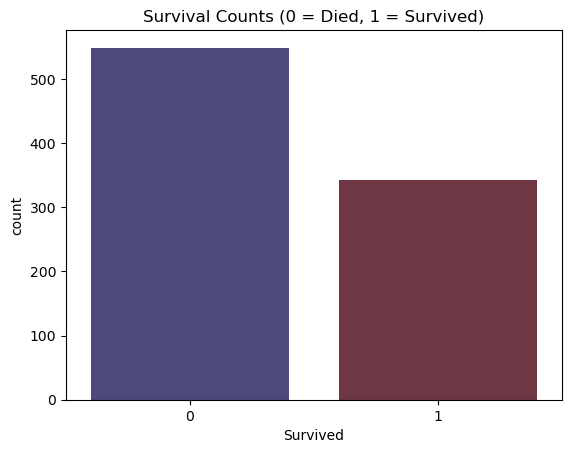

In [19]:
# Lets see the survival rate 
sns.countplot(x = 'Survived', data = df, palette = 'icefire')
plt.title('Survival Counts (0 = Died, 1 = Survived)')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

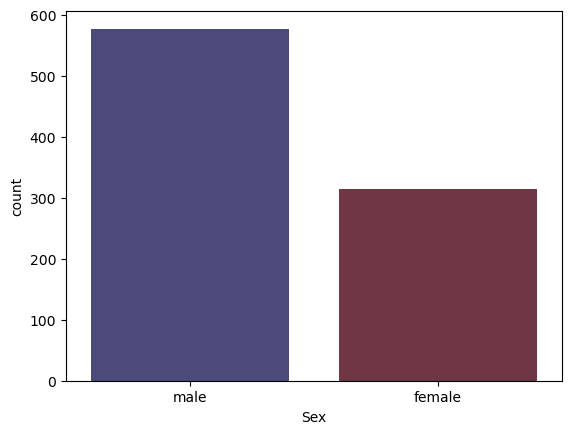

In [20]:
# Lets take a look at the Male - Female Ratio
sns.countplot(x = 'Sex', data = df, palette = 'icefire')

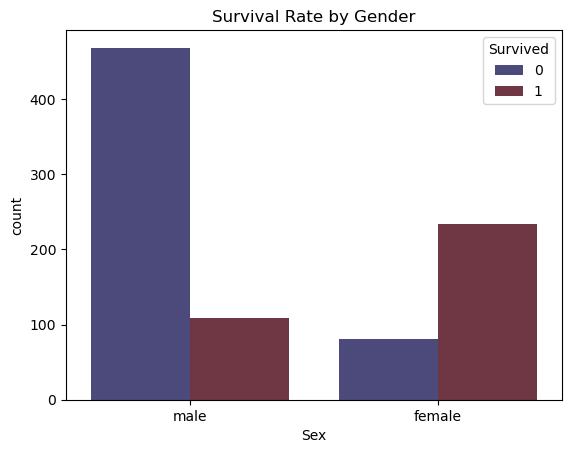

In [21]:
# Number of people who survived by Gender class
sns.countplot(x = 'Sex', hue = 'Survived', data = df, palette = 'icefire')
plt.title('Survival Rate by Gender')
plt.show()

The plot confirms <b> Women more likely survivied than Men.</b>

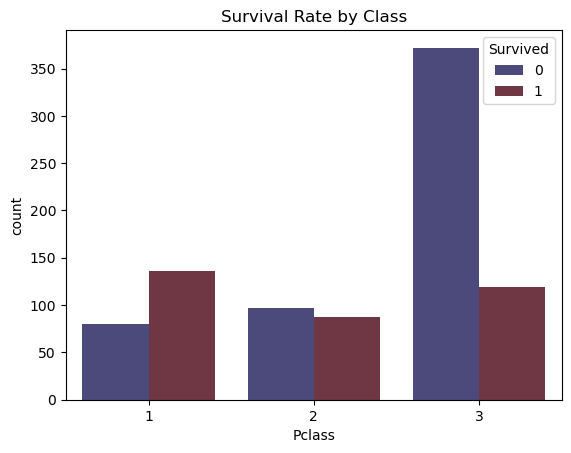

In [23]:
# Lets check the survival rate by class 
sns.countplot(x = 'Pclass', hue = 'Survived', data = df, palette = 'icefire')
plt.title('Survival Rate by Class')
plt.show()

The people who were in <b>1st class more likely survived </b>than other classes. <br>
The people who were in the <b>3rd class more likely dead </b>than other classes.

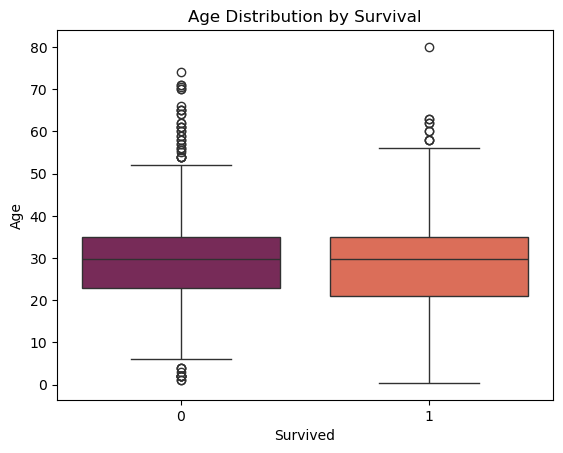

In [25]:
# Checking for Age with survival rate
sns.boxplot(x = 'Survived', y = 'Age', data = df, palette = 'rocket')
plt.title('Age Distribution by Survival')
plt.show()

Age may have a weak influence on survival.

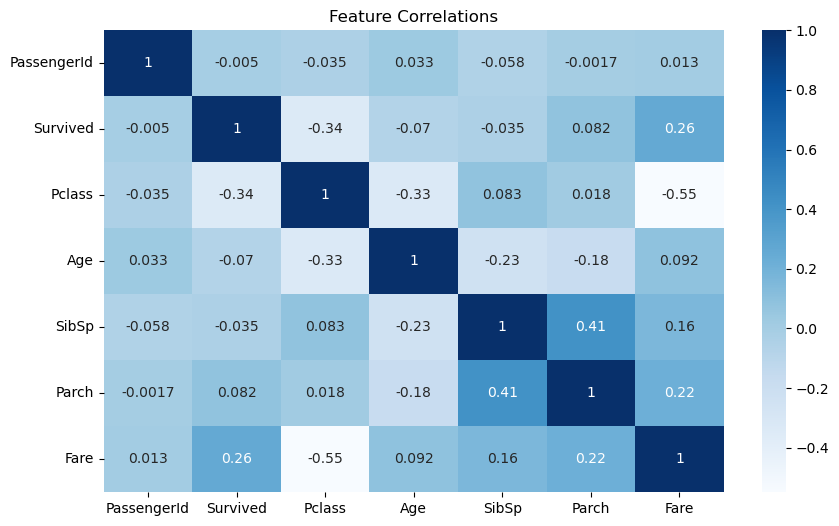

In [27]:
# Heatmap for Correlations
plt.figure(figsize = (10, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap = 'Blues')
plt.title('Feature Correlations')
plt.show()

### Encoding the Categorical Columns

In [29]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [30]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [31]:
# Converting these categorical values into numerical values
df.replace({'Sex' : {'male' : 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}}, inplace = True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Separating features and targets

In [34]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis = 1)
Y = df['Survived']

We have dropped columns which are of no use in the model prediction.

In [36]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


### Splitting into training and testing data

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


### Model Training

In [41]:
model = LogisticRegression()

In [42]:
model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

In [74]:
X_train_pred = model.predict(X_train)
print(X_train_pred)

[0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1
 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 

In [76]:
training_data_acc = accuracy_score(Y_train, X_train_pred)
print("Accuracy Score of training data: ", training_data_acc)

Accuracy Score of training data:  0.8061797752808989


The accuracy is around 80%, which means the model performed well on training data.

Now let's calculate the testing data accuracy.

In [80]:
X_test_pred = model.predict(X_test)
print(X_test_pred)

[1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1]


In [82]:
testing_data_acc = accuracy_score(Y_test, X_test_pred)
print("Accuracy Score of testing data: ", testing_data_acc)

Accuracy Score of testing data:  0.8156424581005587


We received an accuracy of 81% which means the model performed well on our testing data as well.